## Identify outliers based on continuous data using the complete_patient spreadsheet

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
data.shape

(21818, 51)

In [5]:
continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']

[Text(0.5, 1.0, 'Age by Severity')]

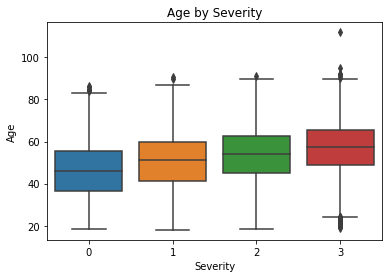

In [10]:
sns.boxplot(x = 'Severity', y="Age", data=data).set(title='Age by Severity')


[Text(0.5, 1.0, 'Height by Severity')]

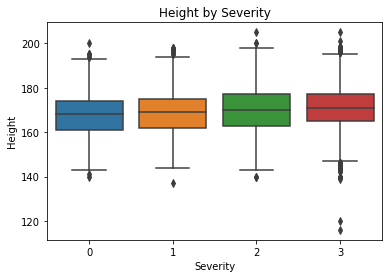

In [11]:
sns.boxplot(x = 'Severity', y="Height", data=data).set(title='Height by Severity')

[Text(0.5, 1.0, 'Weight by Severity')]

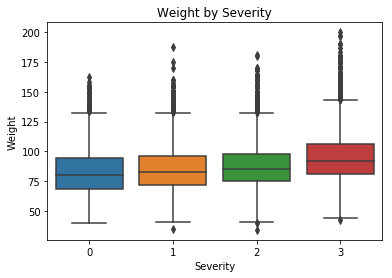

In [12]:
sns.boxplot(x = 'Severity', y="Weight", data=data).set(title='Weight by Severity')

[Text(0.5, 1.0, 'Cervical_perimeter by Severity')]

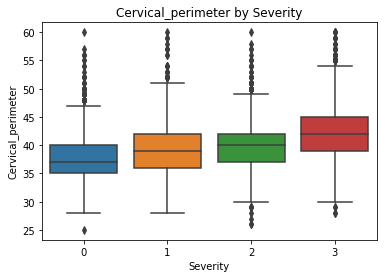

In [13]:
sns.boxplot(x = 'Severity', y="Cervical_perimeter", data=data).set(title='Cervical_perimeter by Severity')

[Text(0.5, 1.0, 'Abdominal_perimeter by Severity')]

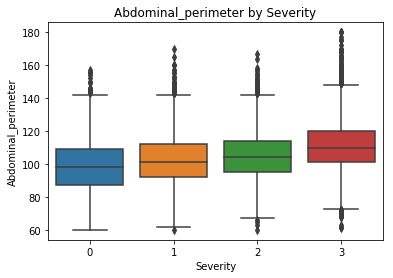

In [14]:
sns.boxplot(x = 'Severity', y="Abdominal_perimeter", data=data).set(title='Abdominal_perimeter by Severity')

[Text(0.5, 1.0, 'Systolic_BP by Severity')]

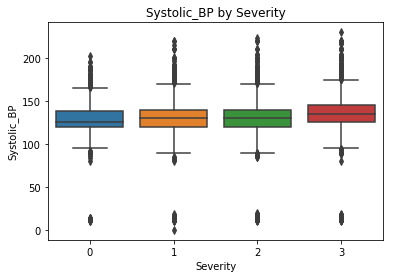

In [15]:
sns.boxplot(x = 'Severity', y="Systolic_BP", data=data).set(title='Systolic_BP by Severity')

[Text(0.5, 1.0, 'Diastolic_BP by Severity')]

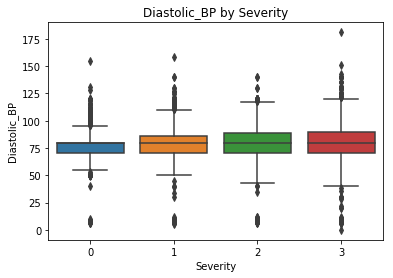

In [16]:
sns.boxplot(x = 'Severity', y="Diastolic_BP", data=data).set(title='Diastolic_BP by Severity')

[Text(0.5, 1.0, 'BMI by Severity')]

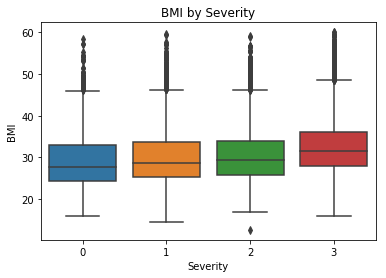

In [17]:
sns.boxplot(x = 'Severity', y="BMI", data=data).set(title='BMI by Severity')

[Text(0.5, 1.0, 'Epworth_scale by Severity')]

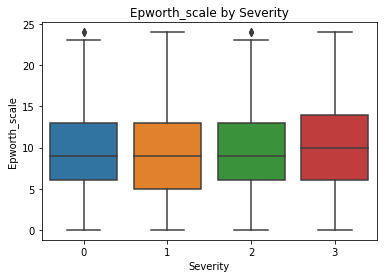

In [18]:
sns.boxplot(x = 'Severity', y="Epworth_scale", data=data).set(title='Epworth_scale by Severity')

[Text(0.5, 1.0, 'Pichots_scale by Severity')]

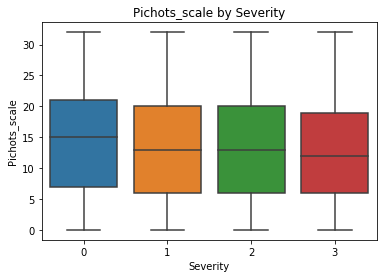

In [19]:
sns.boxplot(x = 'Severity', y="Pichots_scale", data=data).set(title='Pichots_scale by Severity')

[Text(0.5, 1.0, 'Depression_scale by Severity')]

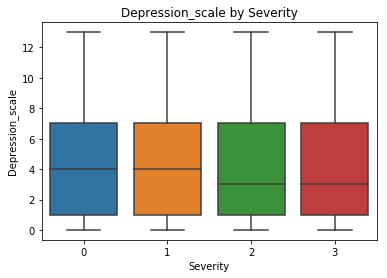

In [20]:
sns.boxplot(x = 'Severity', y="Depression_scale", data=data).set(title='Depression_scale by Severity')

### Removing outliers

#### Removing outliers by z- score >3 separating samples by severity

In [24]:
continuous_z = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 
              'BMI','Epworth_scale','Pichots_scale','Depression_scale', 'Severity']  # added severity for groupby function
z = data[continuous_z].groupby(['Severity']).transform(stats.zscore).abs()   # z score absolute value by Severity
data_z = data[(z < 3).all(axis=1)]            # keeping only rows where  z scores < 3 


In [25]:
z

,Age,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,Diastolic_BP,BMI,Epworth_scale,Pichots_scale,Depression_scale
39,0.076420,0.134495,0.236344,0.693536,0.900765,0.440499,0.235996,0.321635,1.353803,1.066772,0.241187
41,0.308640,1.594211,0.486294,1.558932,0.104249,0.770616,0.802252,0.378239,1.762053,0.505547,0.021192
46,0.967787,0.978352,0.916354,0.914170,1.925079,1.248737,1.368525,1.287849,0.843208,1.256632,1.123846
55,1.318575,1.344998,0.679242,0.432889,1.000187,0.386699,0.687499,1.169118,1.471679,1.722272,1.189185
56,0.009790,1.539069,1.163372,0.243042,0.360385,1.255062,0.094432,0.308349,0.398866,0.021756,0.545951
...,...,...,...,...,...,...,...,...,...,...,...
190460,0.228201,0.523122,0.145077,0.440946,0.672628,1.248737,0.996926,0.419102,1.435976,0.035669,0.097890
190467,1.244724,0.405726,1.386111,0.657945,1.488782,0.876501,1.014598,1.315419,1.159062,1.429615,1.070709
190469,0.268422,1.166611,1.553213,0.914170,0.870383,1.298888,1.071246,1.140703,1.132686,1.210488,0.415089
190502,1.496587,2.242476,1.336121,1.333685,1.024148,0.682722,0.802252,0.352642,0.964321,0.384599,1.028325


In [109]:
data_z

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190460,111385,2.0,53.596167,0.0,0.0,1.0,164.0,88.0,37.0,92.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,14.0,4.0,1
190467,111392,1.0,72.539357,0.0,1.0,1.0,167.0,67.0,39.0,89.0,...,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,3
190469,111394,2.0,46.986995,0.0,1.0,1.0,158.0,56.0,35.0,89.0,...,1.0,1.0,1.0,0.0,1.0,0.0,15.0,24.0,6.0,1
190502,111424,2.0,75.698836,0.0,1.0,0.0,150.0,68.0,36.0,96.0,...,1.0,1.0,1.0,0.0,0.0,0.0,5.0,16.0,8.0,3


In [5]:
print(data.shape)
print(data_z.shape)

(21818, 51)
(20946, 51)


#### Removing outliers by IQR >< 1.5 separating samples by severity

In [12]:
def quartile (df):
    Q1 = df[continuous_z].quantile(0.25) # Calculating quartile 1 by severity
    Q3 = df[continuous_z].quantile(0.75)
    IQR = Q3 - Q1
    df= df[~((df[continuous_z] < (Q1 - 1.5 * IQR)) |(df[continuous_z] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df
    

In [7]:
data_IQR = data.groupby('Severity').apply(quartile).reset_index(level=0, drop=True).sort_index()

# this has removed rows in which any continuous data are > 1.5IQR out of bounds

In [8]:
data_IQR

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190460,111385,2.0,53.596167,0.0,0.0,1.0,164.0,88.0,37.0,92.0,...,1.0,1.0,1.0,0.0,0.0,0.0,2.0,14.0,4.0,1
190467,111392,1.0,72.539357,0.0,1.0,1.0,167.0,67.0,39.0,89.0,...,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,3
190469,111394,2.0,46.986995,0.0,1.0,1.0,158.0,56.0,35.0,89.0,...,1.0,1.0,1.0,0.0,1.0,0.0,15.0,24.0,6.0,1
190502,111424,2.0,75.698836,0.0,1.0,0.0,150.0,68.0,36.0,96.0,...,1.0,1.0,1.0,0.0,0.0,0.0,5.0,16.0,8.0,3


In [9]:
print(data.shape)
print(data_IQR.shape)

(21818, 51)
(19817, 51)


### Random Forests on data no outliers removed

In [10]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

In [11]:
X=data[features]  # Features  
y=data['Severity']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [12]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4546287809349221


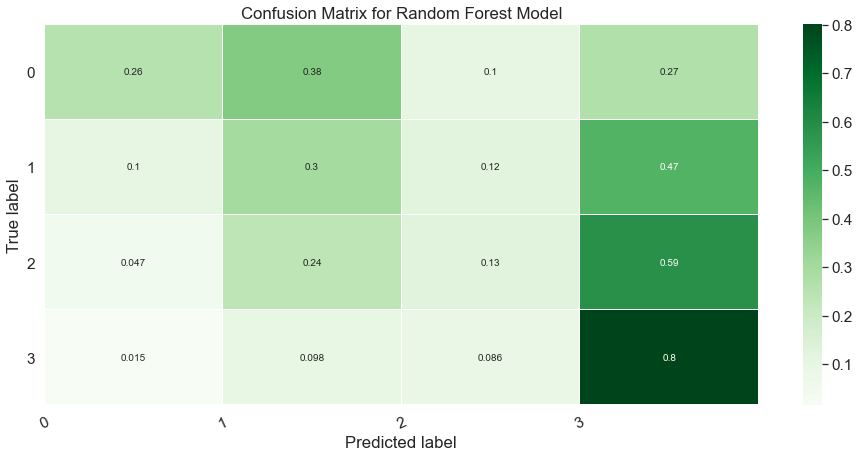

In [13]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0','1','2','3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Random Forests on data_z

In [14]:
X=data_z[features]  # Features  
y=data_z['Severity']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [15]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4579952267303103


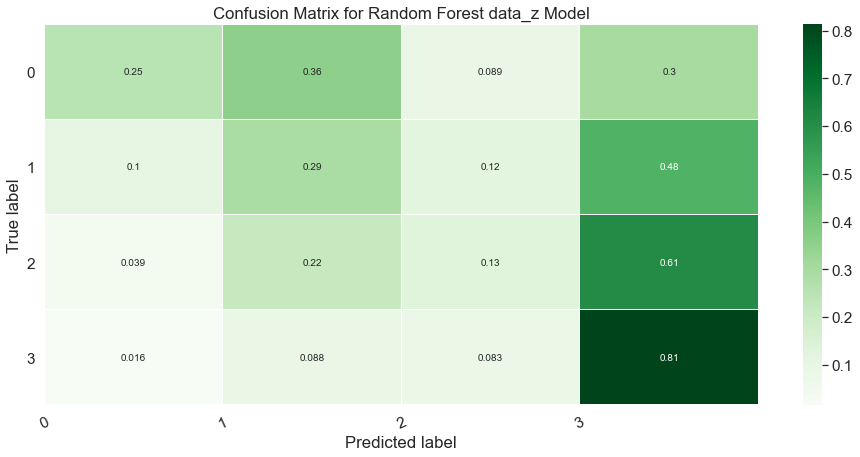

In [16]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0','1','2','3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest data_z Model')
plt.show()

### Random Forests on data_IQR

In [17]:
X=data_IQR[features]  # Features  
y=data_IQR['Severity']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [18]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46266397578203833


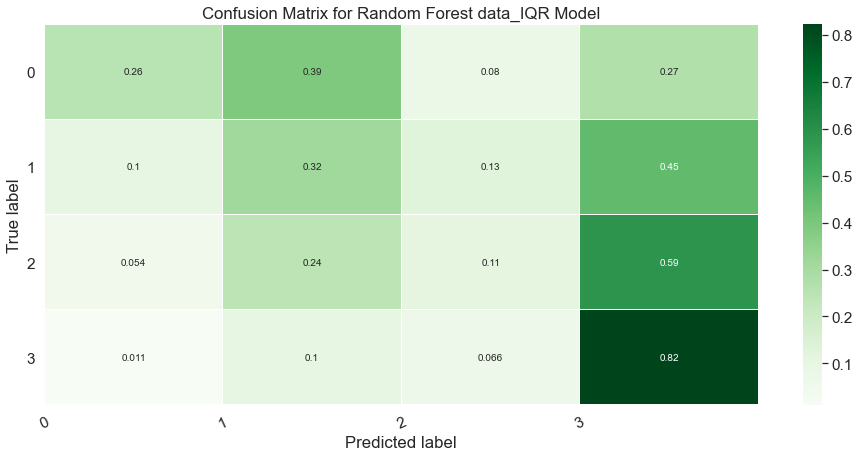

In [19]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0','1','2','3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest data_IQR Model')
plt.show()